# 1. Import the required libraries

In [67]:
##---------Type the code below this line------------------##

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report


# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [69]:
##---------Type the code below this line------------------##

In [70]:
# Importing Fashion-MNIST database of fashion articles from Tensorflow
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [71]:
# Checking shape/size of the dataset
print(f'Xtrain size: ', Xtrain.shape)
print(f'Xtest size: ', Xtest.shape)
print(f'Ytrain size: ', Ytrain.shape)
print(f'Ytest size: ', Ytest.shape)


Xtrain size:  (60000, 28, 28)
Xtest size:  (10000, 28, 28)
Ytrain size:  (60000,)
Ytest size:  (10000,)


In [72]:
Xtrain.dtype

dtype('uint8')

In [73]:
Xtest.dtype

dtype('uint8')

In [74]:
Ytrain.dtype

dtype('uint8')

In [75]:
Ytest.dtype

dtype('uint8')

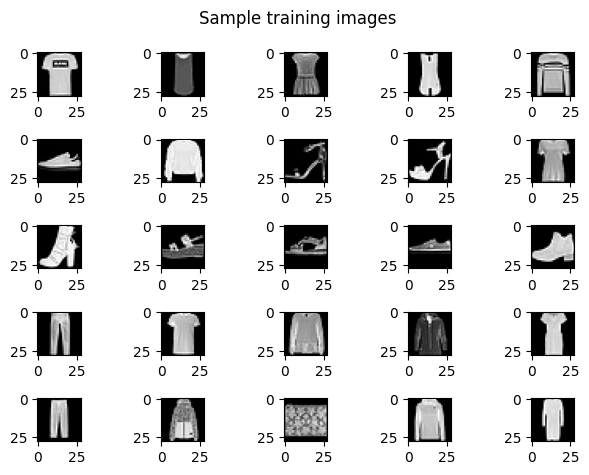

In [76]:
# Plotting sample images of training set
plt.suptitle('Sample training images')
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(Xtrain[i], 'gray')
plt.tight_layout()
plt.show()

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



<span style="color:green">
    
**Size of the dataset**: The Fashion-MNIST dataset contains 60,000 images in total.

**Type of data attributes**: The dataset is made up of grayscale images that are 28x28 pixels in size​1​.

**What are you classifying?**: The classification task involves identifying the type of clothing item present in each image. There are 10 categories: **T-Shirt/Top, Trouser, Pullover, Dress, Coat, Sandals, Shirt, Sneaker, Bag, and Ankle boots.**

**Distribution of the categories of the target/label**: The dataset is evenly balanced across all categories, with 6,000 images per category​1​. This means that there is an equal number of examples for each class, which is important in ensuring that the model does not become biased towards more frequently represented classes.



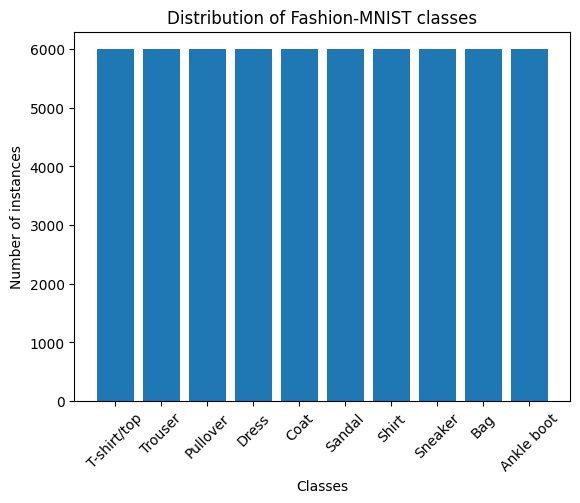

In [77]:
# Plotting the distribution of the categories of the target/label

# Count the number of instances for each label
label_counts = np.bincount(Ytrain)

# Create a bar chart
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.bar(labels, label_counts)
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.title('Distribution of Fashion-MNIST classes')
plt.xticks(rotation=45)
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [78]:
##---------Type the code below this line------------------##

In [79]:
# Code for Reshaping and Normalizing the data and encoding categorical data
Xtrain = Xtrain.reshape((60000, 28*28))    # reshaping the input set to size 28*28.
Xtrain = Xtrain.astype('float32')/255      # normalizing to grayscale & set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshaping the input set to size 28*28.
Xtest = Xtest.astype('float32')/255        # normalizing to grayscale & set datatype as float32

# One-hot encode the labels
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [80]:
##---------Type the code below this line------------------##
# Already done above

## 3.3 Split the data into training set and testing set

In [81]:
##---------Type the code below this line------------------##

# The Fashion-MNIST dataset from Keras is already split into a training set and a testing set when it is downloaded

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [82]:
##---------Type the answer below this line------------------##

<span style="color:green">
    The Fashion-MNIST dataset provided by Keras is already preprocessed to a large extent and doesn't require the usual preprocessing steps like duplicate removal, missing data imputation, or inconsistency removal. It's a well-curated dataset specifically designed for machine learning tasks, and thus, most of the data inconsistencies, missing data, and duplicates are already handled.

However, we still need to do some preprocessing to make the data suitable for a deep learning model. As the data are images, many of the steps mentioned, like stop word removal, lemmatization, stemming, and vectorization, are not applicable here. Those are techniques used for text data.

Here are the preprocessing steps we need for this dataset:

    
- **Reshaping the data**: As we are using only Dense layers, we need to flatten the 2D image data into a 1D array. This has already been done in the previous steps.

- **Normalizing the data**: Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such, it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

- **Encoding categorical data**: The output variable is an integer from 0 to 9. This is a multi-class classification problem. Therefore, we need to one-hot encode the output variable. This means that the output variable will be transformed from a single column with 10 number values to 10 binary columns with a 1 for the class and 0 values for all other classesword

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [83]:
##---------Type the code below this line------------------##

In [84]:
# Instantiate the model

dnn_model = models.Sequential()

In [85]:

dnn_model = Sequential()

# Add the first hidden layer with 128 units and 'relu' activation function
dnn_model.add(Dense(128, input_dim=28*28, activation='relu'))

# Add the second hidden layer with 64 units and 'relu' activation function
dnn_model.add(Dense(64, activation='relu'))

# Add the third hidden layer with 32 units and 'relu' activation function
dnn_model.add(Dense(32, activation='relu'))

# Add the output layer with 10 units (one for each class) and 'softmax' activation function
dnn_model.add(Dense(10, activation='softmax'))

dnn_model.summary()   # model summary

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [86]:
##---------Type the answer below this line------------------##

<span style="color:green">
In the model architecture we proposed, the details are as follows:
    


-    **Number of layers**: There are 4 layers in total - 3 hidden layers and 1 output layer. The input layer isn't traditionally counted as a layer as it doesn't involve any weights or computations.

-    **Number of units in each layer**: The first hidden layer has 128 units, the second hidden layer has 64 units, the third hidden layer has 32 units, and the output layer has 10 units (corresponding to the 10 classes of the target variable).

-    **Total number of trainable parameters**:

      - For the first layer: There are 28 * 28 (input size) * 128 (number of units) + 128 (bias terms) = 100,480 parameters.
        
      - For the second layer: There are 128 (number of units in the previous layer) * 64 (number of units) + 64 (bias terms) = 8,256 parameters.
      -  For the third layer: There are 64 (number of units in the previous layer) * 32 (number of units) + 32 (bias terms) = 2,080 parameters.
      -  For the output layer: There are 32 (number of units in the previous layer) * 10 (number of units) + 10 (bias terms) = 330 parameters.

The total number of parameters is the sum of these, which is 111,146 parameters. All these parameters are trainable.

**Justifications**:

-    **Number of layers and units**: The choice of the number of layers and units in each layer is more of an art than a science. It depends on the complexity of the problem, the amount of data available, computational constraints, and the risk of overfitting. In this case, we start with a moderate-sized network with several layers, each having a decreasing number of units. This is a common architecture choice for DNNs as it's believed that each subsequent layer should extract more abstract, high-level features and thus may require fewer neurons. However, these choices are largely empirical and should be tuned based on validation performance.

-    **Total number of trainable parameters**: This is simply a result of the network architecture and isn't something that is explicitly chosen. More parameters can potentially represent more complex functions, but they also pose a higher risk of overfitting, especially if you don't have a lot of data. The number of parameters in this model is moderate, not too small to underfit and not too large to overfit severely given the size of the dataset (60,000 images).

Also these are our initial choices. It's crucial to monitor the performance of the model on a validation set and adjust these choices as needed, potentially using techniques like cross-validation, early stopping, or dropout to mitigate overfitting if it becomes a problem.

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [87]:
##---------Type the code below this line------------------##

In [88]:
sgd = SGD(learning_rate=0.01)   # Using Stochastic Gradient Descent
dnn_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])  # Using Categorical CE loss and Accuracy metric

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [89]:
##---------Type the code below this line------------------##

In [90]:
h = dnn_model.fit(Xtrain, Ytrain, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 14s 8ms/step - loss: 0.8551 - accuracy: 0.7159 - val_loss: 0.5513 - val_accuracy: 0.8052
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5101 - accuracy: 0.8210 - val_loss: 0.4706 - val_accuracy: 0.8347
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4564 - accuracy: 0.8397 - val_loss: 0.4480 - val_accuracy: 0.8424
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4244 - accuracy: 0.8508 - val_loss: 0.4264 - val_accuracy: 0.8491
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4030 - accuracy: 0.8564 - val_loss: 0.5153 - val_accuracy: 0.8092
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3845 - accuracy: 0.8632 - val_loss: 0.3989 - val_accuracy: 0.8576
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3687 - accuracy: 0.8697 - val_loss: 0.3931 - val_accurac

**Observation**: We can see that Training accuracy has increased sharply from 0.71 to 0.82 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.9018 after 20 epochs. Similarly, Training loss reduced from 0.8551 to 0.5101 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.2693 after 20 epochs.Validation accuracy improved from 0.805 to 0.878.

In [91]:
print('Training loss \t', h.history['loss'][-1])
print('Training accuracy ', h.history['accuracy'][-1])

Training loss 	 0.2693450450897217
Training accuracy  0.9017916917800903


Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [92]:
##---------Type the answers below this line------------------##

<span style="color:green">
    
-    **Optimizer: SGD (Stochastic Gradient Descent)**: SGD is one of the most basic yet effective optimization algorithms for training neural networks. It updates the weights of the neural network one training example at a time. This method has been chosen for its simplicity and effectiveness, but it might not be the most efficient in terms of convergence speed compared to more sophisticated methods like Adam or RMSProp. However, it's worth noting that in some cases, SGD can outperform these methods, especially with the right learning rate schedule and for certain types of models.

-    **Regularization**: No explicit regularization like L1 or L2 has been used in this model. Regularization is a technique used to prevent overfitting by adding a penalty to the loss function based on the size of the weights. If the model is overfitting the training data (i.e., performing well on the training data but poorly on the validation or test data), using regularization can help. In this case, since no regularization is applied, it assumes the model's capacity (as defined by the architecture) is appropriate for the complexity of the task and the amount of available data. However, if overfitting is observed, adding regularization would be a good next step.

-    **Hyperparameters**: The primary hyperparameters in this case are the number of layers in the network, the number of units in each layer, and the number of training epochs. These have been chosen somewhat arbitrarily for this initial model. The number of layers and units in each layer often need to be tuned based on the specific task, the amount of available data, and the complexity of the features the model needs to learn. The number of epochs was set to 20 as a reasonable balance between allowing the model to learn from the data and preventing overtraining. If the model's performance on a validation set is still improving after 20 epochs, increasing the number of epochs would be a good next step. The learning rate of the optimizer is another important hyperparameter that often needs to be tuned. In this case, the default learning rate of 0.01 for SGD optimizer is used.

# 6. Test the model - 0.5 marks


In [93]:
##---------Type the code below this line------------------##

In [94]:
test_loss, test_accuracy = dnn_model.evaluate(Xtest, Ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8709


In [95]:
print('Testing loss \t', test_loss)
print('Testing accuracy ', test_accuracy)

Testing loss 	 0.3673240840435028
Testing accuracy  0.8708999752998352


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [96]:
##---------Type the code below this line------------------##

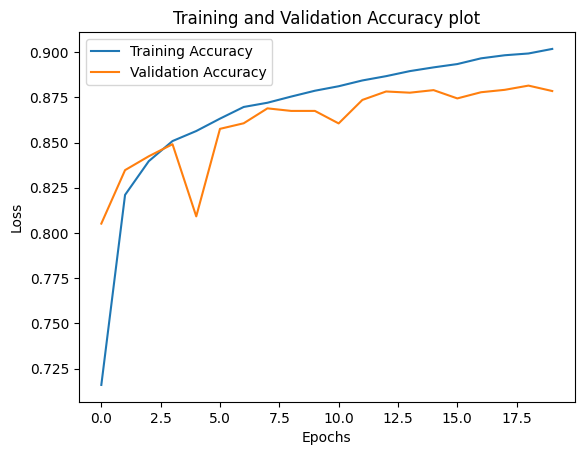

In [97]:
# plot the training and validation accuracy

plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy plot')
plt.legend()
plt.show()

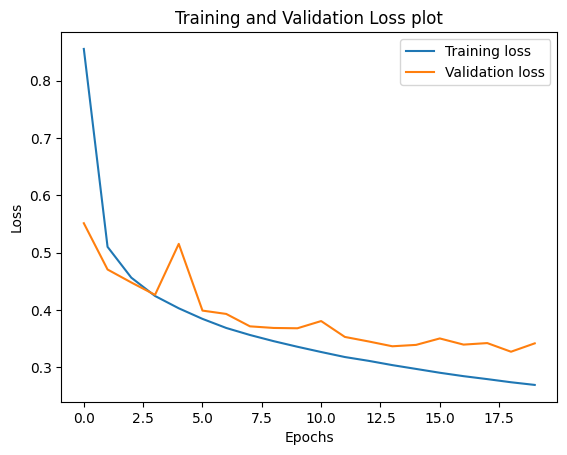

In [98]:
# plot the training and validation loss

plt.plot(h.history['loss'], label='Training loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss plot')
plt.legend()
plt.show()

In [99]:
print('Testing loss \t', test_loss)
print('Testing accuracy ', test_accuracy)

Testing loss 	 0.3673240840435028
Testing accuracy  0.8708999752998352


In [100]:
# Generate predictions for the test data
y_pred_probs = dnn_model.predict(Xtest)

# Convert the predictions from probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(Ytest, axis=1)

# Confusion matrix
print("\n\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test_labels, y_pred)
print(conf_mat)

# Precision, recall, F1 score
list_of_class_labels = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print("\n\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=list_of_class_labels))

313/313 [==============================] - 1s 2ms/step


Confusion Matrix:
[[826  10  24  29  11   1  84   1  14   0]
 [  2 974   0  19   3   0   2   0   0   0]
 [ 12   1 742  12 177   0  52   0   4   0]
 [ 18  22  14 859  65   0  16   0   6   0]
 [  0   2  54  16 902   0  24   0   2   0]
 [  1   0   0   1   0 929   1  37   4  27]
 [124   3  85  33 140   0 595   0  20   0]
 [  0   0   0   0   0  14   0 953   1  32]
 [  2   0   7   4   6   1   5   7 968   0]
 [  0   0   0   1   0   3   1  34   0 961]]


Classification Report:
              precision    recall  f1-score   support

 T-Shirt/Top       0.84      0.83      0.83      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.80      0.74      0.77      1000
       Dress       0.88      0.86      0.87      1000
        Coat       0.69      0.90      0.78      1000
      Sandal       0.98      0.93      0.95      1000
       Shirt       0.76      0.59      0.67      1000
     Sneaker       0.92      0.95   

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [101]:
##---------Type the code below this line------------------##

8.1 Model architecture by decreasing one layer

In [102]:

"""dnn_model_4layer = models.Sequential()

# Layer1 : Input layer

dnn_model_4layer.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer2 : hidden layer
dnn_model_4layer.add(layers.Dense(60, activation='relu'))

# Layer3 : hidden layer
dnn_model_4layer.add(layers.Dense(30, activation='relu'))

# Layer4 : Output layer
dnn_model_4layer.add(layers.Dense(10, activation='softmax'))

dnn_model_4layer.summary()"""

"dnn_model_4layer = models.Sequential()\n\n# Layer1 : Input layer\n\ndnn_model_4layer.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))\n\n# Layer2 : hidden layer\ndnn_model_4layer.add(layers.Dense(60, activation='relu'))\n\n# Layer3 : hidden layer\ndnn_model_4layer.add(layers.Dense(30, activation='relu'))\n\n# Layer4 : Output layer\ndnn_model_4layer.add(layers.Dense(10, activation='softmax'))\n\ndnn_model_4layer.summary()"

In [103]:
dnn_model_less = Sequential()

# Add the first hidden layer with 128 units and 'relu' activation function
dnn_model_less.add(Dense(128, input_dim=28*28, activation='relu'))

# Add the second hidden layer with 64 units and 'relu' activation function
dnn_model_less.add(Dense(64, activation='relu'))

# # Add the third hidden layer with 32 units and 'relu' activation function
# dnn_model.add(Dense(32, activation='relu'))

# Add the output layer with 10 units (one for each class) and 'softmax' activation function
dnn_model_less.add(Dense(10, activation='softmax'))

dnn_model_less.summary()   # model summary

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [104]:
sgd = SGD(learning_rate=0.01)   # Using Stochastic Gradient Descent
dnn_model_less.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])  # Using Categorical CE loss and Accuracy metric

In [105]:
h_less = dnn_model_less.fit(Xtrain, Ytrain, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7982 - accuracy: 0.7401 - val_loss: 0.5445 - val_accuracy: 0.8158
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5118 - accuracy: 0.8248 - val_loss: 0.4767 - val_accuracy: 0.8295
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4616 - accuracy: 0.8402 - val_loss: 0.4490 - val_accuracy: 0.8457
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4325 - accuracy: 0.8493 - val_loss: 0.4611 - val_accuracy: 0.8407
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4121 - accuracy: 0.8553 - val_loss: 0.4215 - val_accuracy: 0.8523
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3972 - accuracy: 0.8611 - val_loss: 0.4211 - val_accuracy: 0.8492
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3847 - accuracy: 0.8642 - val_loss: 0.3997 - val_accuracy:

**Observation**: We can see that Training accuracy has increased sharply from 0.74 to 0.82 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.895 after 20 epochs. Similarly, Training loss reduced from 0.7982 to 0.5118 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.2938 after 20 epochs. Validation accuracy improved from 0.815 to 0.878.

In [106]:
print('Training loss by decreasing one layer\t', h_less.history['loss'][-1])
print('Training accuracy by decreasing one layer', h_less.history['accuracy'][-1])

Training loss by decreasing one layer	 0.29380717873573303
Training accuracy by decreasing one layer 0.8955833315849304


8.2 Model architecture by increasing one layer

In [107]:
dnn_model_more = Sequential()

# Add the first hidden layer with 128 units and 'relu' activation function
dnn_model_more.add(Dense(256, input_dim=28*28, activation='relu'))

# Add the second hidden layer with 128 units and 'relu' activation function
dnn_model_more.add(Dense(128,  activation='relu'))

# Add the third hidden layer with 64 units and 'relu' activation function
dnn_model_more.add(Dense(64, activation='relu'))

# Add the fourth hidden layer with 32 units and 'relu' activation function
dnn_model_more.add(Dense(32, activation='relu'))

# Add the output layer with 10 units (one for each class) and 'softmax' activation function
dnn_model_more.add(Dense(10, activation='softmax'))

dnn_model_more.summary()   # model summary

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               200960    
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [108]:
sgd = SGD(learning_rate=0.01)   # Using Stochastic Gradient Descent
dnn_model_more.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])  # Using Categorical CE loss and Accuracy metric

In [109]:
h_more = dnn_model_more.fit(Xtrain, Ytrain, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8821 - accuracy: 0.7037 - val_loss: 0.5347 - val_accuracy: 0.8097
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4974 - accuracy: 0.8256 - val_loss: 0.5011 - val_accuracy: 0.8205
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4397 - accuracy: 0.8429 - val_loss: 0.4337 - val_accuracy: 0.8494
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4050 - accuracy: 0.8557 - val_loss: 0.4005 - val_accuracy: 0.8587
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3819 - accuracy: 0.8630 - val_loss: 0.3884 - val_accuracy: 0.8644
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3635 - accuracy: 0.8691 - val_loss: 0.3975 - val_accuracy: 0.8579
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3487 - accuracy: 0.8737 - val_loss: 0.3873 - val_accuracy:

**Observation**: We can see that Training accuracy has increased sharply from 0.70 to 0.82 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.9108 after 20 epochs. Similarly, Training loss reduced from 0.8821 to 0.4974 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.2390 after 20 epochs. Validation accuracy improved from 0.809 to 0.886.

In [110]:
print('Training loss by increasing one layer\t', h_more.history['loss'][-1])
print('Training accuracy by increasing one layer', h_more.history['accuracy'][-1])

Training loss by increasing one layer	 0.23895224928855896
Training accuracy by increasing one layer 0.9108333587646484


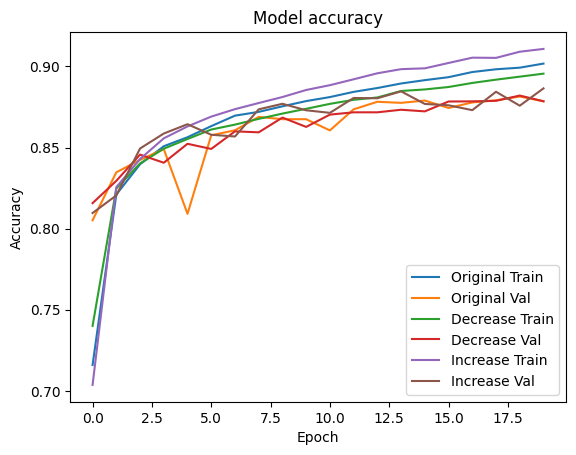

In [111]:
# Plotting the comparison of the training and validation accuracy of the three architecures
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h_less.history['accuracy'])
plt.plot(h_less.history['val_accuracy'])
plt.plot(h_more.history['accuracy'])
plt.plot(h_more.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Train', 'Original Val', 'Decrease Train', 'Decrease Val', 'Increase Train', 'Increase Val'], loc='lower right')
plt.show()

Observation: After decreasing one layer, there is slight decrease in Training accuracy (0.9018 to 0.8956) whereas after increasing one layer, Training accuracy has improved from 0.9018 to 0.9108.

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [112]:
##---------Type the code below this line------------------##

9.1 Regularization with Dropout of ratio 0.25

In [113]:
# Adding Dropout of ratio 0.25:
dnn_model_dropout = Sequential()

dnn_model_dropout.add(Dense(128, activation='relu', input_shape=(28*28,)))
dnn_model_dropout.add(Dropout(0.25))
dnn_model_dropout.add(Dense(64, activation='relu'))
dnn_model_dropout.add(Dropout(0.25))
dnn_model_dropout.add(Dense(32, activation='relu'))
dnn_model_dropout.add(Dropout(0.25))
dnn_model_dropout.add(Dense(10, activation='softmax'))  # Output layer
dnn_model_dropout.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 10)              

In [114]:
sgd = SGD(learning_rate=0.01)   # Using Stochastic Gradient Descent
dnn_model_dropout.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])  # Using Categorical CE loss and Accuracy metric

In [115]:
h_dropout = dnn_model_dropout.fit(Xtrain, Ytrain, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2631 - accuracy: 0.5410 - val_loss: 0.6791 - val_accuracy: 0.7590
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7970 - accuracy: 0.7123 - val_loss: 0.5666 - val_accuracy: 0.7883
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6875 - accuracy: 0.7550 - val_loss: 0.5235 - val_accuracy: 0.8060
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6249 - accuracy: 0.7826 - val_loss: 0.4781 - val_accuracy: 0.8296
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5802 - accuracy: 0.7992 - val_loss: 0.4571 - val_accuracy: 0.8368
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5555 - accuracy: 0.8078 - val_loss: 0.4392 - val_accuracy: 0.8419
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5272 - accuracy: 0.8175 - val_loss: 0.4236 - val_accuracy:

**Observation**: We can see that Training accuracy has increased sharply from 0.54 to 0.71 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.8608 after 20 epochs. Similarly, Training loss reduced from 1.2631 to 0.797 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.4010 after 20 epochs. Validation accuracy improved from 0.759 to 0.871.

In [116]:
print('Training loss with Dropout\t', h_dropout.history['loss'][-1])
print('Training accuracy with Dropout', h_dropout.history['accuracy'][-1])

Training loss with Dropout	 0.40098536014556885
Training accuracy with Dropout 0.8607916831970215


9.2 Regularization with Dropout of ratio 0.25 with L2 regulariser with factor 1e−04

In [117]:
dnn_model_dropout_l2 = Sequential()

dnn_model_dropout_l2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4), input_shape=(28*28,)))
dnn_model_dropout_l2.add(Dropout(0.25))
dnn_model_dropout_l2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
dnn_model_dropout_l2.add(Dropout(0.25))
dnn_model_dropout_l2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
dnn_model_dropout_l2.add(Dropout(0.25))
dnn_model_dropout_l2.add(Dense(10, activation='softmax'))  # Output layer

dnn_model_dropout_l2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 10)              

In [118]:
sgd = SGD(learning_rate=0.01)   # Using Stochastic Gradient Descent
dnn_model_dropout_l2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])  # Using Categorical CE loss and Accuracy metric

In [119]:
h_dropout_l2 = dnn_model_dropout_l2.fit(Xtrain, Ytrain, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.2973 - accuracy: 0.5382 - val_loss: 0.7316 - val_accuracy: 0.7513
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8402 - accuracy: 0.7097 - val_loss: 0.5969 - val_accuracy: 0.7857
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7168 - accuracy: 0.7591 - val_loss: 0.5447 - val_accuracy: 0.8117
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6517 - accuracy: 0.7848 - val_loss: 0.5013 - val_accuracy: 0.8335
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6075 - accuracy: 0.8036 - val_loss: 0.4829 - val_accuracy: 0.8401
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5855 - accuracy: 0.8117 - val_loss: 0.4743 - val_accuracy: 0.8442
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5707 - accuracy: 0.8176 - val_loss: 0.4635 - val_accuracy:

**Observation**: We can see that Training accuracy has increased sharply from 0.53 to 0.70 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.8606 after 20 epochs. Similarly, Training loss reduced from 1.2973 to 0.8402 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.4457 after 20 epochs. Validation accuracy improved from 0.751 to 0.874.

In [120]:
print('Training loss with Dropout and L2 regularization\t', h_dropout_l2.history['loss'][-1])
print('Training accuracy with Dropout and L2 regularization', h_dropout_l2.history['accuracy'][-1])

Training loss with Dropout and L2 regularization	 0.4457239508628845
Training accuracy with Dropout and L2 regularization 0.8605625033378601


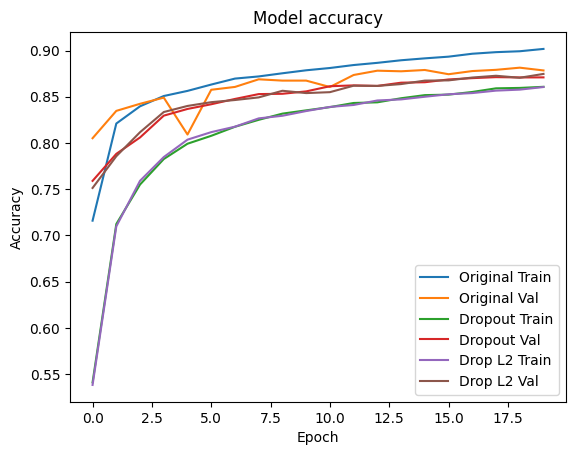

In [121]:
# Plotting the comparison of the training and validation accuracy of the three architecures
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h_dropout.history['accuracy'])
plt.plot(h_dropout.history['val_accuracy'])
plt.plot(h_dropout_l2.history['accuracy'])
plt.plot(h_dropout_l2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Train', 'Original Val', 'Dropout Train', 'Dropout Val', 'Drop L2 Train', 'Drop L2 Val'], loc='lower right')
plt.show()

**Observation**: With Dropout regularization, Training accuracy is 0.8608 and with Dropout & L2 regularization, training accuracy is 0.8606. This accuracy is lower than original architecture (without regularization Training accuracy: 0.9018) which could be because Regularization technique tries to reduce overfitting.

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [122]:
##---------Type the code below this line------------------##

10.1 RMSProp optimizer

In [123]:
dnn_model_rmsprop = models.Sequential()
dnn_model_rmsprop.add(layers.Dense(128, activation='relu', input_shape= (28*28,)))
dnn_model_rmsprop.add(layers.Dense(64, activation='relu'))
dnn_model_rmsprop.add(layers.Dense(32, activation='relu'))
dnn_model_rmsprop.add(layers.Dense(10, activation='softmax'))

In [124]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)
dnn_model_rmsprop.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])  # Using RMSProp optimizer, Categorical CE loss and Accuracy metric

In [125]:
h_rmsprop = dnn_model_rmsprop.fit(Xtrain, Ytrain, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.6326 - accuracy: 0.7777 - val_loss: 0.5153 - val_accuracy: 0.8127
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4237 - accuracy: 0.8456 - val_loss: 0.3905 - val_accuracy: 0.8568
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3731 - accuracy: 0.8619 - val_loss: 0.3873 - val_accuracy: 0.8568
Epoch 4/20
375/375 [==============================] - 4s 9ms/step - loss: 0.3437 - accuracy: 0.8727 - val_loss: 0.3725 - val_accuracy: 0.8655
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3215 - accuracy: 0.8815 - val_loss: 0.3348 - val_accuracy: 0.8789
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3034 - accuracy: 0.8874 - val_loss: 0.3696 - val_accuracy: 0.8700
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2911 - accuracy: 0.8920 - val_loss: 0.3536 - val_accuracy: 0.8733
Epoch 

**Observation**: We can see that Training accuracy has increased sharply from 0.77 to 0.84 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.9273 after 20 epochs. Similarly, Training loss reduced from 0.6362 to 0.4237 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.1914 after 20 epochs. Validation accuracy improved from 0.812 to 0.887.

In [126]:
print('Training loss with RMSProp optimizer \t', h_rmsprop.history['loss'][-1])
print('Training accuracy with RMSProp optimizer', h_rmsprop.history['accuracy'][-1])

Training loss with RMSProp optimizer 	 0.19138690829277039
Training accuracy with RMSProp optimizer 0.9273333549499512


10.2 Adam optimizer

In [127]:
dnn_model_adam = models.Sequential()

dnn_model_adam.add(layers.Dense(128, activation='relu', input_shape= (28*28,)))
dnn_model_adam.add(layers.Dense(64, activation='relu'))
dnn_model_adam.add(layers.Dense(32, activation='relu'))
dnn_model_adam.add(layers.Dense(10, activation='softmax'))

In [128]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
dnn_model_adam.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Using Categorical CE loss and Accuracy metric

In [129]:
h_adam = dnn_model_adam.fit(Xtrain, Ytrain, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.6097 - accuracy: 0.7907 - val_loss: 0.4492 - val_accuracy: 0.8405
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4072 - accuracy: 0.8557 - val_loss: 0.3984 - val_accuracy: 0.8587
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3615 - accuracy: 0.8697 - val_loss: 0.3761 - val_accuracy: 0.8652
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3350 - accuracy: 0.8780 - val_loss: 0.3511 - val_accuracy: 0.8742
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3135 - accuracy: 0.8838 - val_loss: 0.3537 - val_accuracy: 0.8718
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2995 - accuracy: 0.8888 - val_loss: 0.3665 - val_accuracy: 0.8637
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2895 - accuracy: 0.8925 - val_loss: 0.3454 - val_accuracy: 0.8751
Epoch 

**Observation**: We can see that Training accuracy has increased sharply from 0.79 to 0.85 between epoch 1 and epoch 2. From epoch 2 onwards, Training accuracy is gradually improving and we got accuracy of 0.927 after 20 epochs. Similarly, Training loss reduced from 0.6097 to 0.4072 from epoch 1 to epoch 2, afterthat loss is decreasing gradually and final loss is 0.1899 after 20 epochs. Validation accuracy improved from 0.840 to 0.887.

In [130]:
print('Training loss with Adam optimizer \t', h_adam.history['loss'][-1])
print('Training accuracy with Adam optimizer', h_adam.history['accuracy'][-1])

Training loss with Adam optimizer 	 0.18987485766410828
Training accuracy with Adam optimizer 0.9279375076293945


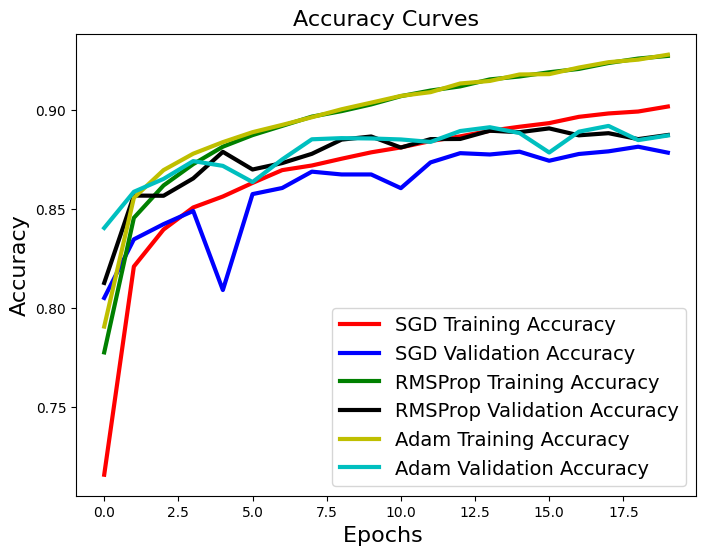

In [131]:
plt.figure(figsize=[8,6])
plt.plot(h.history['accuracy'],'r',linewidth=3.0)
plt.plot(h.history['val_accuracy'],'b',linewidth=3.0)
plt.plot(h_rmsprop.history['accuracy'],'g',linewidth=3.0)
plt.plot(h_rmsprop.history['val_accuracy'],'k',linewidth=3.0)
plt.plot(h_adam.history['accuracy'],'y',linewidth=3.0)
plt.plot(h_adam.history['val_accuracy'],'c',linewidth=3.0)
plt.legend(['SGD Training Accuracy', 'SGD Validation Accuracy',
            'RMSProp Training Accuracy', 'RMSProp Validation Accuracy',
            'Adam Training Accuracy', 'Adam Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Observation**: With rmsProp optimizer, Training accuracy is 0.9273 and with Adam optimizer, training accuracy is 0.9279. This accuracy is better than original architecture (accuracy: 0.9018).

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [132]:
##---------Type the code below this line------------------##

<span style="color:green">
    
### Observations:

-    **Architecture**: The model with the original architecture (section 4.1) performed better in terms of validation accuracy than the models with one less layer (section 8.1) and one additional layer (section 8.2). The model from section 8.1 underperformed, likely due to reduced capacity, while the model from section 8.2 did not show significant improvement, possibly due to overfitting or increased complexity without significant benefits.

-    **Regularization**: The models with dropout and L2 regularization (sections 9.1 and 9.2) showed more stable training and validation curves compared to the original model (section 4.1), indicating that these regularization techniques helped prevent overfitting. The model with both dropout and L2 regularization (section 9.2) showed the highest validation accuracy, suggesting that combining these regularization techniques can be beneficial.

-    **Optimizer**: The models trained with RMSProp (section 10.1) and Adam (section 10.2) optimizers showed faster convergence than the model trained with SGD (section 5.2). Among these, the model trained with Adam demonstrated the highest validation accuracy, suggesting that Adam's adaptive learning rate can be advantageous for this particular task.
